In [25]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using DSP
using HDF5

In [2]:
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BAT

In [38]:
include("../model-35/likelihood.jl")
include("../model-35/utill_model.jl")
include("../utill.jl")

plot_projections (generic function with 1 method)

In [39]:
conv_mat = load("../../data/experiment/dataset_2/m2/conv-matrix-upd-2.jld2")

conv_matrices = (
    cam_1 = conv_mat["cam_1"],
    cam_2 = conv_mat["cam_2"],
    cam_3 = conv_mat["cam_3"],
    cam_4 = conv_mat["cam_4"],
);


In [43]:
param_truth = (
    tr_size = [0.14, 0.14], 
    ang_spr = [4.0, 4.0], 
    waist = [2.90], 
    algmx = [36.0, 37.0, 19.0, 33.0], 
    algmy = [33.0, 34.0, 21.0, 35.0], 
    cam4_ped = 26.0, 
    cam4_light_fluct = 1.30, 
    cam4_light_amp = 8.90, 
    resx = [1, 1, 1], resy = [1, 1, 1], 
    cam4_resx = 3, 
    cam4_resy = 3, 
    psx = [27.1, 21.6, 114.0], 
    psy = [30.5, 23.4, 125.0], 
    cam4_psx = 121.8, 
    cam4_psy = 120.0, 
    light_amp = [8.5, 11.1, 2.5], 
    s_cam = [0.0, 1.478, 15.026, 23.115]
);

In [48]:
event = generate_event(param_truth, 27.0, conv_matrices)

(cam_1 = [0.0 61.0 … 73.0 6.0; 0.0 1.0 … 6.0 77.0; … ; 2.0 0.0 … 82.0 1.0; 4.0 9.0 … 1.0 17.0], cam_2 = [3.0 5.0 … 9.0 0.0; 8.0 318.0 … 1.0 0.0; … ; 0.0 302.0 … 0.0 0.0; 5.0 63.0 … 0.0 1.0], cam_3 = [8.0 10.0 … 4.0 12.0; 38.0 14.0 … 13.0 247.0; … ; 159.0 7.0 … 1.0 3.0; 0.0 3.0 … 1.0 227.0], cam_4 = [20.0 18.0 … 37.0 32.0; 26.0 13.0 … 18.0 22.0; … ; 25.0 25.0 … 28.0 34.0; 22.0 30.0 … 31.0 20.0], population = 27.0)

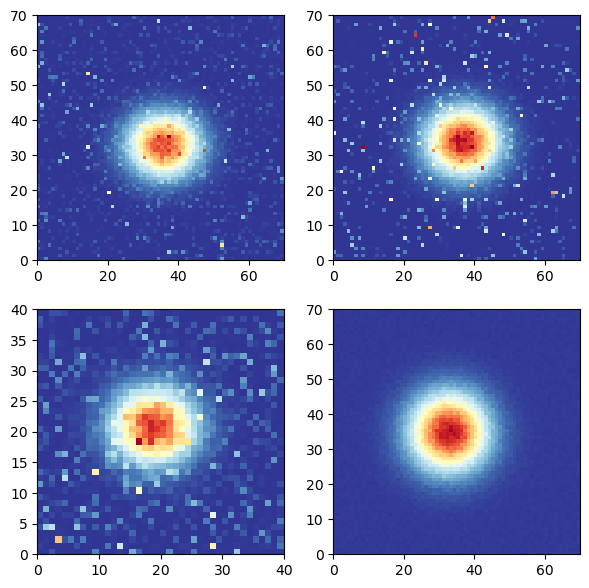

PyObject <matplotlib.collections.QuadMesh object at 0x7fe0b48e3910>

In [49]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(event.cam_1, cmap="RdYlBu_r")
ax[1,2].pcolormesh(event.cam_2, cmap="RdYlBu_r")
ax[2,1].pcolormesh(event.cam_3, cmap="RdYlBu_r")
ax[2,2].pcolormesh(event.cam_4, cmap="RdYlBu_r")

In [50]:
# @save "../../data/sampling_results/Benchmark-6/event-35.jld" event

In [51]:
# prior = NamedTupleDist(
#         tr_size = [truncated(Normal(0.14, 0.04), 0.06, 0.19), truncated(Normal(0.14, 0.04), 0.06, 0.19)],
#         ang_spr = [truncated(Normal(4.0, 2.0), 2.0, 7.0), truncated(Normal(4.0, 2.0), 2.0, 7.0)],
#         waist = [truncated(Normal(2.9, 0.03), 2.65, 3.5)],
#         algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
#         algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
#         cam4_ped = 4.0 .. 40.0,
#         cam4_light_fluct = 1.0 .. 3.0,
#         cam4_light_amp = 1.6 .. 9.9, 
#         resx = [1, 1, 1], # 23, 24, 25, 
#         resy = [1, 1, 1], # 26,27, 28, 
#         cam4_resx = truncated(Normal(3, 1.5), 0, Inf),
#         cam4_resy = truncated(Normal(3, 1.5), 0, Inf), 
#         psx = [27.1, 21.6, 114.0], # 31, 32, 33
#         psy = [30.5, 23.4, 125.0], # 34, 35, 36
#         cam4_psx = 121.8, # 37
#         cam4_psy = 120.0, # 38
#         light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
#         s_cam = [0.0, 1.478, 15.026, 23.1150],
#     ); # first

prior = NamedTupleDist(
        tr_size = [0.13 .. 0.15, 0.13 .. 0.15],
        ang_spr = [3.5 .. 4.5, 3.5 .. 4.5],
        waist = [2.8 .. 3.0],
        algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        cam4_ped = 4.0 .. 40.0,
        cam4_light_fluct = 1.0 .. 3.0,
        cam4_light_amp = 1.6 .. 9.9, 
        resx = [1, 1, 1], # 23, 24, 25, 
        resy = [1, 1, 1], # 26,27, 28, 
        cam4_resx = 2.0 .. 4.0,
        cam4_resy = 2.0 .. 4.0, 
        psx = [27.1, 21.6, 114.0], # 31, 32, 33
        psy = [30.5, 23.4, 125.0], # 34, 35, 36
        cam4_psx = 121.8, # 37
        cam4_psy = 120.0, # 38
        light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
        s_cam = [0.0, 1.478, 15.026, 23.1150],
    );

In [52]:
"""
    Log-Likelihood of the beamline (4 cameras included)
"""
function log_lik_ndiff(;  
    e = event,
    cv_mat = conv_matrices,
    func = conv_tabl_discrete,
    cv_1 = cv_mat.cam_1,
    cv_2 = cv_mat.cam_2,
    cv_3 = cv_mat.cam_3,
    n_threads = Threads.nthreads(),
    )
    
    return params -> begin 
        ll = 0.0
        ll += likelihood_cam13(params, e.cam_1, e.population, cv_1, func, 1, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_2, e.population, cv_2, func, 2, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_3, e.population, cv_3, func, 3, n_threads=n_threads)
        ll += likelihood_cam4(params, e.cam_4, e.population, 4, n_threads=n_threads)
        return LogDVal(ll)
    end
        
end

log_likelihood = log_lik_ndiff()

#146 (generic function with 1 method)

In [53]:
posterior = PosteriorDensity(log_likelihood, prior)

tuning = AdaptiveMHTuning(
    λ = 0.5,
    α = ClosedInterval(0.15,0.25),
    β = 1.5,
    c = ClosedInterval(1e-4,1e2),
    r = 0.5,
)

convergence = BrooksGelmanConvergence(
    threshold = 1.1,
    corrected = false
)

init = MCMCChainPoolInit(
    init_tries_per_chain = ClosedInterval(50,150),
    max_nsamples_init = 500,
    max_nsteps_init = 500,
    max_time_init = Inf
)

burnin = MCMCMultiCycleBurnin(
    max_nsamples_per_cycle = 10000,
    max_nsteps_per_cycle = 10000,
    max_time_per_cycle = Inf,
    max_ncycles = 130
)

nsamples = 1*10^5
nchains = 4

sampler = MetropolisHastings(tuning=tuning,)

algorithm = MCMCSampling(sampler=sampler, 
    nchains=nchains, 
    init=init, 
    burnin=burnin, 
    convergence=convergence
);

In [54]:
@time samples_tot = bat_sample(
    posterior, nchains*nsamples, algorithm,
    max_neval = nchains*nsamples,
    max_time = Inf,
);

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64,10}
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/algotypes/bat_default.jl:44
┌ Info: Trying to generate 4 viable MCMC chain(s).
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/samplers/mcmc/chain_pool_init.jl:63
┌ Info: Selected 4 MCMC chain(s).
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/samplers/mcmc/chain_pool_init.jl:185
┌ Info: Begin tuning of 4 MCMC chain(s).
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/samplers/mcmc/multi_cycle_burnin.jl:38
┌ Info: MCMC Tuning cycle 1 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/samplers/mcmc/multi_cycle_burnin.jl:70
┌ Info: MCMC Tuning cycle 2 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/samplers/mcmc/multi_cycle_burnin.jl:70
┌ Info: MCMC Tuning cycle 3 finished, 4 chains, 0 tuned, 0 converged.
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/samplers/mcmc/multi_cycle_burnin.jl:70
┌ Info: MCMC Tuning cycle 4 fini

1346.740734 seconds (1.48 G allocations: 1.326 TiB, 6.80% gc time)


In [55]:
samples = samples_tot.result;

In [56]:
minimum(bat_eff_sample_size(unshaped.(samples)).result)

577.1279439600025

In [57]:
size(flatview(unshaped.(samples.v)))

(21, 85612)

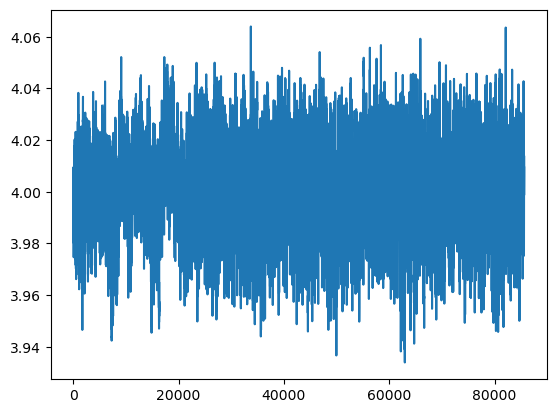

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe139131b80>

In [58]:
plot(flatview(unshaped.(samples.v))[3,:])

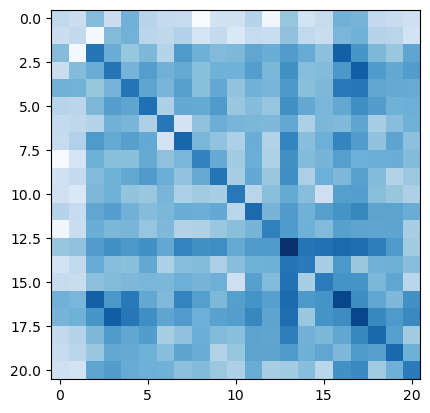

PyObject <matplotlib.image.AxesImage object at 0x7fe132e3db20>

In [59]:
plt.imshow(log.(abs.(cov(flatview(unshaped.(samples.v))'))), cmap="Blues")

In [60]:
# using HDF5

In [61]:
# BAT.bat_write("../../data/sampling_results/Benchmark-6/samples-35.hdf5", unshaped.(samples))

In [62]:
#  27.1, 21.6, 114.0, 30.5, 23.4, 125.0, 121.8, 120.0

In [63]:
findmode_result = bat_findmode(posterior, MaxDensityNelderMead(init = ExplicitInit([mode(samples)])))

fit_par_values = findmode_result.result[]

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64,10}
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/algotypes/bat_default.jl:44


(tr_size = [0.13913513152231619, 0.14013913179372797], ang_spr = [3.996094009605862, 3.9634933256874056], waist = [2.923054884264449], algmx = [36.00193729245043, 36.989260499230156, 18.96805303547017, 32.993180992025366], algmy = [32.99067973972479, 33.98392654100726, 20.998125616307746, 35.01019688525757], cam4_ped = 26.12948228736091, cam4_light_fluct = 1.2951416364958843, cam4_light_amp = 8.893865708973815, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 3.0077380754631204, cam4_resy = 3.1439855987688157, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [8.492349493501216, 11.098832711181991, 2.500170759693053], s_cam = [0.0, 1.478, 15.026, 23.115])

In [28]:
mode(samples)[1]

(tr_size = [0.13999382805804958, 0.13941743756937866], ang_spr = [3.9764024147260746, 3.9610122358287407], waist = [2.9124143728353014], algmx = [35.97171277785723, 37.01927928811669, 19.020713793569247, 32.97540569218815], algmy = [32.989583656202186, 33.98394801090153, 20.992183447723924, 34.99031346824387], cam4_ped = 25.96980486218641, cam4_light_fluct = 1.2877929566662958, cam4_light_amp = 8.892991465432175, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 3.0589732419475384, cam4_resy = 3.1160080042972296, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [8.453921617737624, 11.058037147433426, 2.5027845465887517], s_cam = [0.0, 1.478, 15.026, 23.115])

In [29]:
bat_marginalmode(samples).result

ShapedAsNT((tr_size = [0.13983, 0.13921], ang_spr = [3.9825, 3.9595000000000002], waist = [2.9284999999999997], algmx = [35.9785, 37.0085, 19.0135, 32.98125], algmy = [32.9895, 33.9815, 21.005499999999998, 34.982749999999996], cam4_ped = 26.0475, cam4_light_fluct = 1.29075, cam4_light_amp = 8.88675, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 3.0725, cam4_resy = 3.1375, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [8.4825, 11.0595, 2.49625], s_cam = [0.0, 1.478, 15.026, 23.115]))

In [30]:
mean(samples)[1]

(tr_size = [0.1396676827565751, 0.1391142881416868], ang_spr = [3.9795851082603053, 3.962595433653931], waist = [2.926081397880304], algmx = [35.980258725540494, 37.00612467598913, 19.00946261009245, 32.980541703662205], algmy = [32.99203520788544, 33.9828425737544, 21.00564524994264, 34.98364117561024], cam4_ped = 26.041390901454665, cam4_light_fluct = 1.2879099806170475, cam4_light_amp = 8.889274052153068, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 3.0530719525247734, cam4_resy = 3.1226250225933456, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [8.486062843709506, 11.062011396613771, 2.4955230131382367], s_cam = [0.0, 1.478, 15.026, 23.115])

In [31]:
std(samples)[1]

(tr_size = [0.00042247177708273166, 0.00042862387039792994], ang_spr = [0.016878199652015178, 0.016089040310283777], waist = [0.019275908296288717], algmx = [0.017738133114177112, 0.01440304359320416, 0.027324013645816013, 0.010632232486867824], algmy = [0.0156131919030395, 0.013290319172209407, 0.023983763701821537, 0.011092392548589361], cam4_ped = 0.11978612924698921, cam4_light_fluct = 0.01316821264761079, cam4_light_amp = 0.012788954039213866, resx = 3-element Fill{Int64}: entries equal to 0, resy = 3-element Fill{Int64}: entries equal to 0, cam4_resx = 0.06498939116098967, cam4_resy = 0.06412876423631401, psx = 3-element Fill{Float64}: entries equal to 0.0, psy = 3-element Fill{Float64}: entries equal to 0.0, cam4_psx = 0.0, cam4_psy = 0.0, light_amp = [0.022283149755171396, 0.023802313731160766, 0.013233794071043897], s_cam = 4-element Fill{Float64}: entries equal to 0.0)

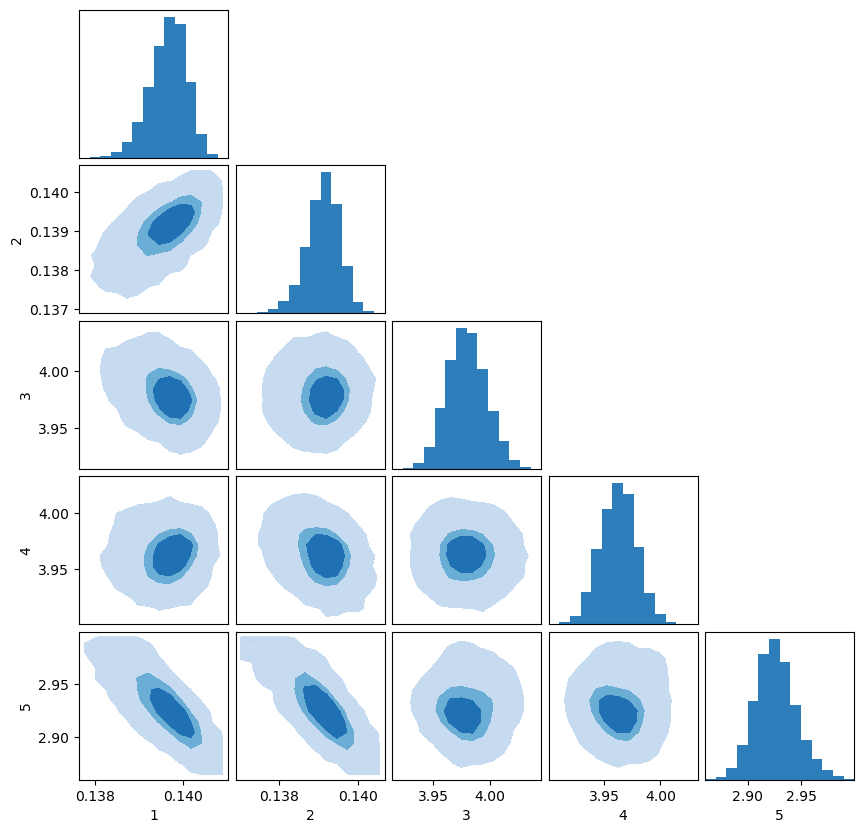

In [32]:
dims = [1,2,3,4,5,]
names = [1,2,3,4,5,6,7,8,9,10, 11]
levels = [0.001, 0.55, 0.9, 0.95,  1,]
# levels = [0.001, 0.90, 1,]
figsize = (10,10)
n_bins = 15

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

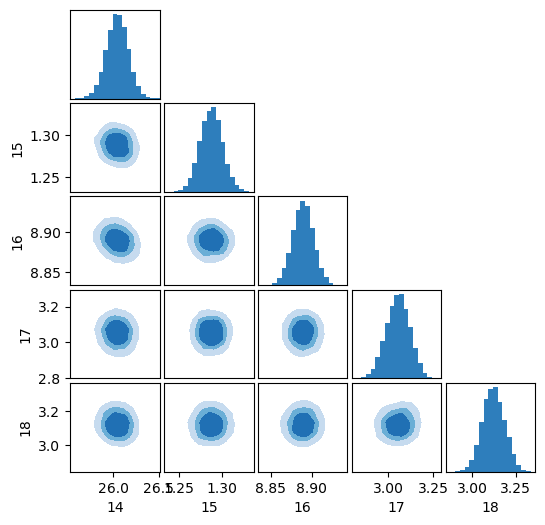

In [33]:
dims = [14, 15, 16, 17, 18]
names = [14, 15, 16, 17, 18]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

In [34]:
flat_truth = vcat([i for i in param_truth]...)
flat_mode = vcat([i for i in mode(samples)[1]]...) ./flat_truth
flat_std = vcat([i for i in std(samples)[1]]...)./flat_truth;

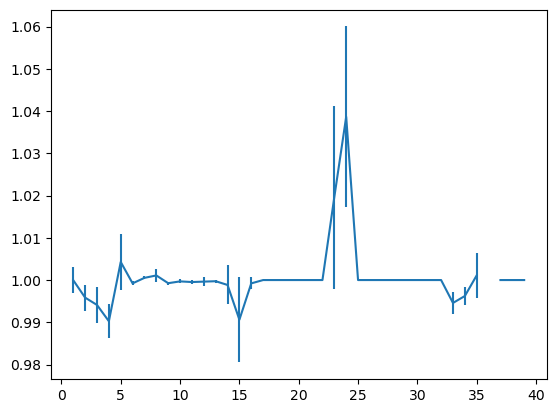

(PyObject <matplotlib.lines.Line2D object at 0x7fe174b65820>, (), (PyObject <matplotlib.collections.LineCollection object at 0x7fe174afabe0>,))

In [35]:
plt.errorbar(1:length(flat_mode), flat_mode, yerr=flat_std )

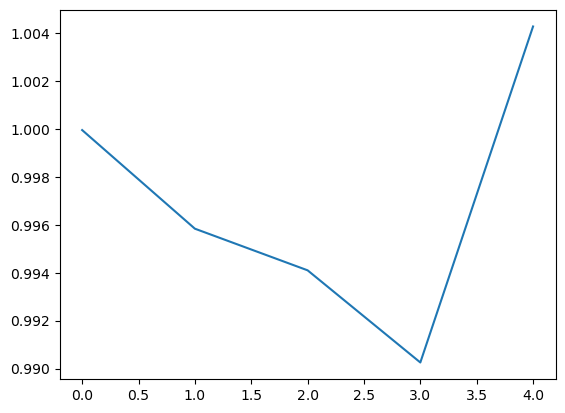

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe0b5069190>

In [36]:
plt.plot(flat_mode[1:5])

In [187]:
labels = [L"\sigma_x", L"\sigma_y", L"\sigma'_x", L"\sigma'_y", "s",
    L"\mu_{x1}", L"\mu_{x2}", L"\mu_{x3}", L"\mu_{x4}", L"\mu_{y1}", L"\mu_{y2}", L"\mu_{y3}", L"\mu_{y4}", 
    "ped", L"\alpha", L"I_4", L"\Delta_x", L"\Delta_y", L"I_1", L"I_2", L"I_3"];

In [188]:
samples_uw = bat_sample(samples, 10^4).result;

┌ Info: Initializing new RNG of type Random123.Philox4x{UInt64,10}
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/algotypes/bat_default.jl:44
┌ Info: Using sampling algorithm OrderedResampling()
└ @ BAT /user/.julia/packages/BAT/kyKKZ/src/algotypes/bat_default.jl:44


In [189]:
truth = [0.14, 0.14, 4.0, 4.0, 2.9, 36.0, 37.0, 19.0, 33.0, 33.0, 34.0, 21.0, 35.0, 26, 1.3, 8.9, 3, 3, 8.5, 11.1, 2.5]
samples_flat = flatview(unshaped.(samples_uw.v)) ./ truth;

In [211]:
data = [i for i in eachrow(samples_flat)];
quant = [(0.01, 0.99) for i in eachrow(samples_flat)];

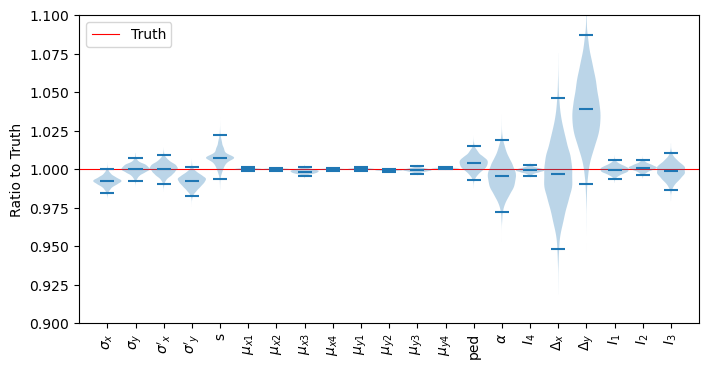

(0.9, 1.1)

In [213]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.axhline(1.0, linestyle="-", lw=0.8, color="red", alpha=1.0, zorder=0, label="Truth")

parts = ax.violinplot(data, widths = 1.0, vert=true, showmeans=true, showextrema=false, quantiles=quant)

# for pc in parts["bodies"]
#     pc.set_facecolor("gray")
#     pc.set_edgecolor("black")
#     pc.set_alpha(0.5)
#     pc.set_linewidth(2)
# end

ax.set_xlim(0.0, length(data)+1)

ax.set_xticks(collect(Base.OneTo(length(data))))
ax.set_xticklabels(labels, rotation = 90, ha="center")
ax.legend(loc="upper left")
ax.set_ylabel("Ratio to Truth")

ax.set_ylim(0.9, 1.1)

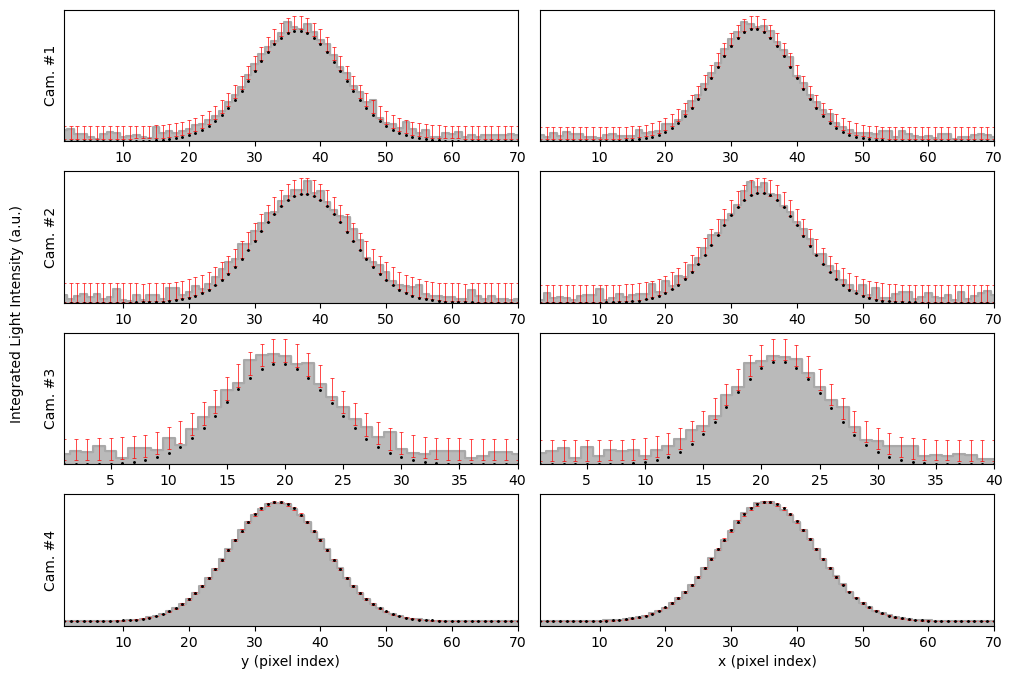

PyObject Text(0.08, 0.5, 'Integrated Light Intensity (a.u.)')

In [192]:
plot_projections(conv_matrices, event, event, mean(samples)[1], isnontr = true)